#Laporan Proyek Machine Learning - Sony Alfauzan

## 1. Import Libraries

In [1]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.8 MB/s eta 0:00:00


In [2]:
## 1. Import Libraries

# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import zipfile
from google.colab import drive

# Import additional libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import shap


# Penjelasan:
# Kita mengimpor berbagai library yang diperlukan untuk analisis data, visualisasi, dan machine learning.
# Penggunaan sklearn memudahkan kita dalam melakukan preprocessing, pemodelan, dan evaluasi.


## 2. Load and Prepare Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/Predictive Analytics Project')


In [5]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
# Ekstrak dataset dari file zip
zip_path = '/content/drive/My Drive/Predictive Analytics Project/Heart Failure Prediction Dataset.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/heart_failure_data')


In [7]:
# Baca dataset
df = pd.read_csv('/content/heart_failure_data/heart.csv')


# Penjelasan:
# Kita memuat data dari Google Drive dan mengekstraknya. Penggunaan Google Drive memudahkan akses dan manajemen dataset, terutama saat bekerja di lingkungan cloud seperti Google Colab.

## 3. Exploratory Data Analysis (EDA)

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

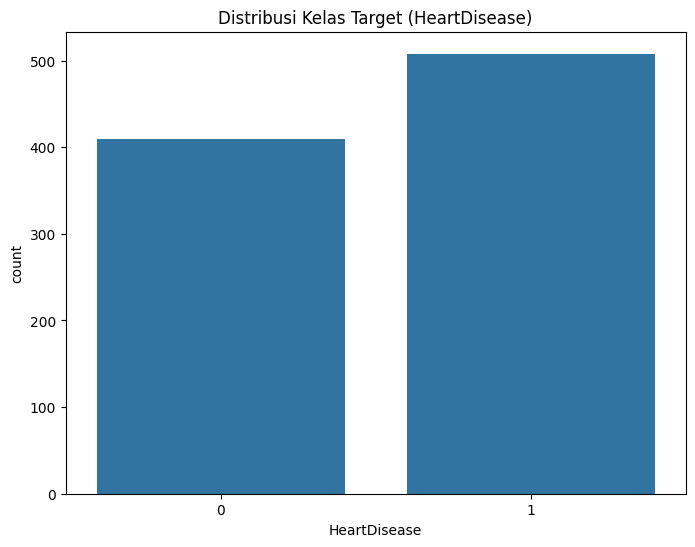

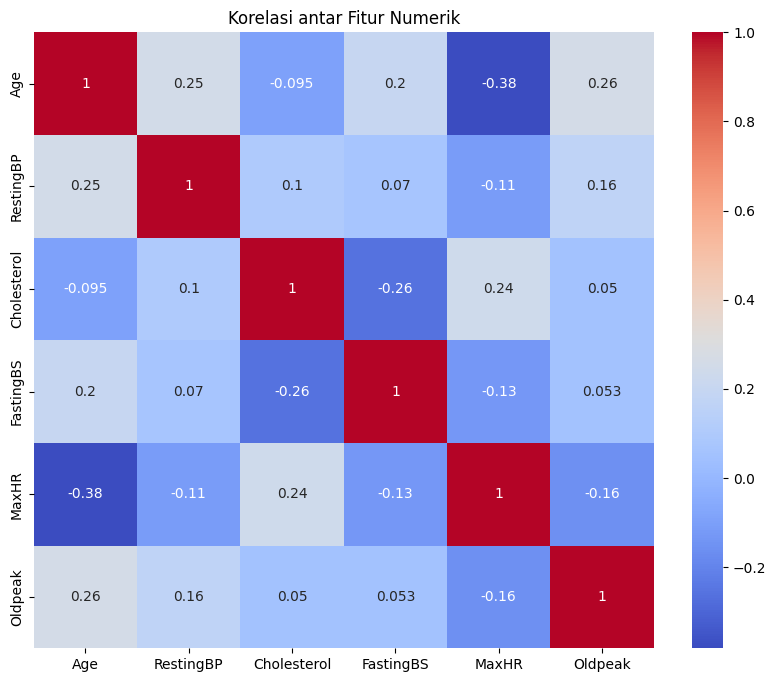

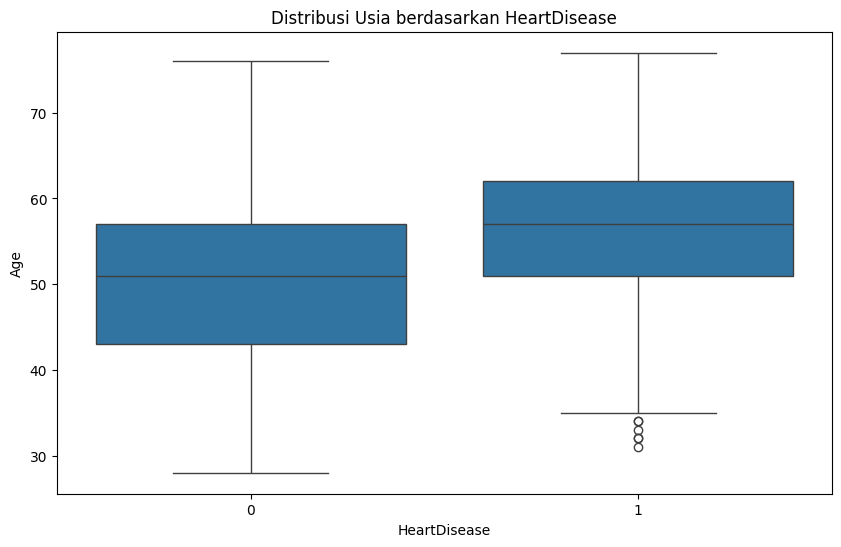

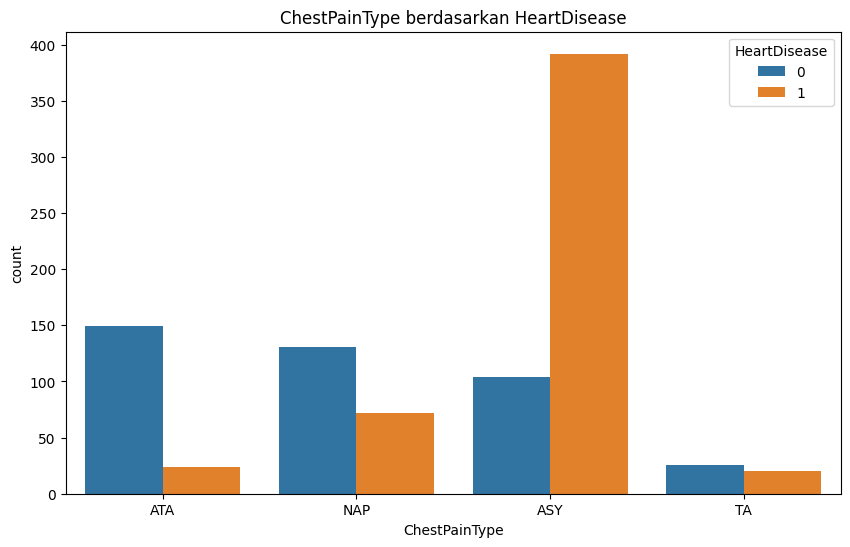

In [8]:
# Tampilkan beberapa baris pertama dari dataset
print(df.head())

# Informasi tentang dataset
print(df.info())

# Statistik deskriptif dataset
print(df.describe())

# Periksa missing values
print(df.isnull().sum())

# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribusi Kelas Target (HeartDisease)')
plt.show()

# Visualisasi korelasi antar fitur numerik
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()

# Visualisasi distribusi usia berdasarkan HeartDisease
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Distribusi Usia berdasarkan HeartDisease')
plt.show()

# Visualisasi ChestPainType berdasarkan HeartDisease
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title('ChestPainType berdasarkan HeartDisease')
plt.show()

# Penjelasan:
# EDA membantu kita memahami karakteristik dataset, seperti distribusi kelas target,
# korelasi antar fitur, dan pola-pola yang mungkin ada dalam data. Visualisasi memudahkan
# interpretasi dan dapat membantu dalam pengambilan keputusan untuk langkah-langkah selanjutnya.


## 4. Data Preparation

In [9]:
# Fungsi untuk encoding fitur kategorikal
def encode_categorical(df, column):
    return pd.get_dummies(df, columns=[column], prefix=column)

# Encoding fitur kategorikal
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for feature in categorical_features:
    df = encode_categorical(df, feature)

# Pisahkan fitur dan target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penjelasan:
# Kita melakukan encoding fitur kategorikal menggunakan one-hot encoding untuk mengubah
# variabel kategorikal menjadi representasi numerik yang dapat digunakan oleh model.
# Data dibagi menjadi set pelatihan dan pengujian untuk evaluasi yang tidak bias.
# Normalisasi fitur penting untuk memastikan semua fitur berada dalam skala yang sama,
# yang dapat meningkatkan performa dan stabilitas model.

## 5. Model Development and Evaluation

Logistic Regression Results:
Accuracy: 0.8533
Precision: 0.9000
Recall: 0.8411
F1-score: 0.8696
ROC-AUC: 0.9266


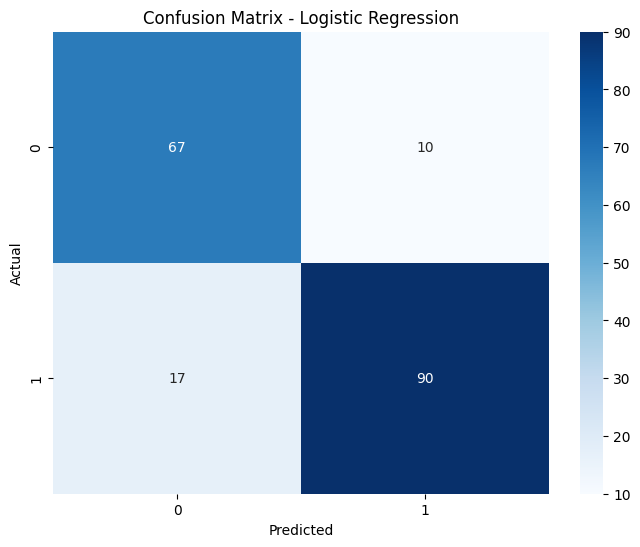

Random Forest Results:
Accuracy: 0.8804
Precision: 0.9048
Recall: 0.8879
F1-score: 0.8962
ROC-AUC: 0.9433


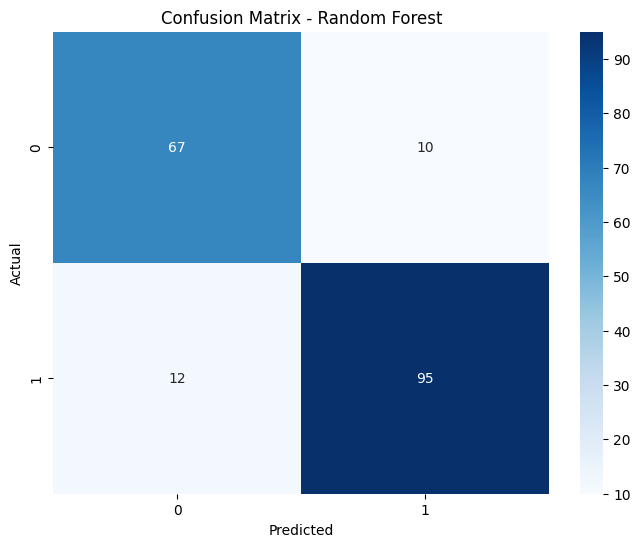

SVM Results:
Accuracy: 0.8913
Precision: 0.9143
Recall: 0.8972
F1-score: 0.9057
ROC-AUC: 0.9325


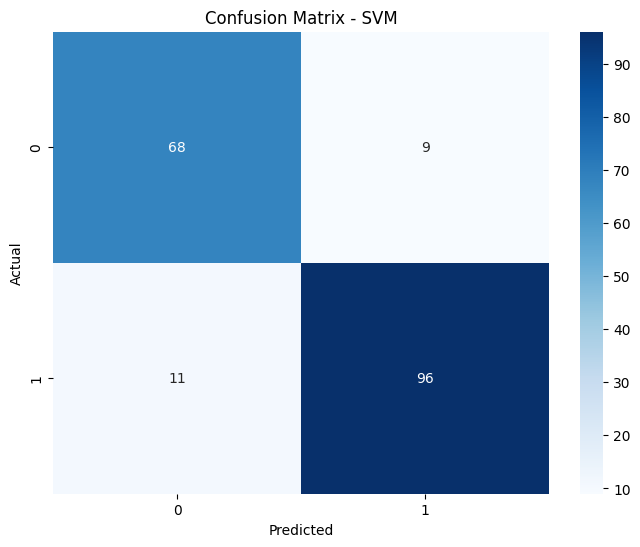

Naive Bayes Results:
Accuracy: 0.8641
Precision: 0.9271
Recall: 0.8318
F1-score: 0.8768
ROC-AUC: 0.9244


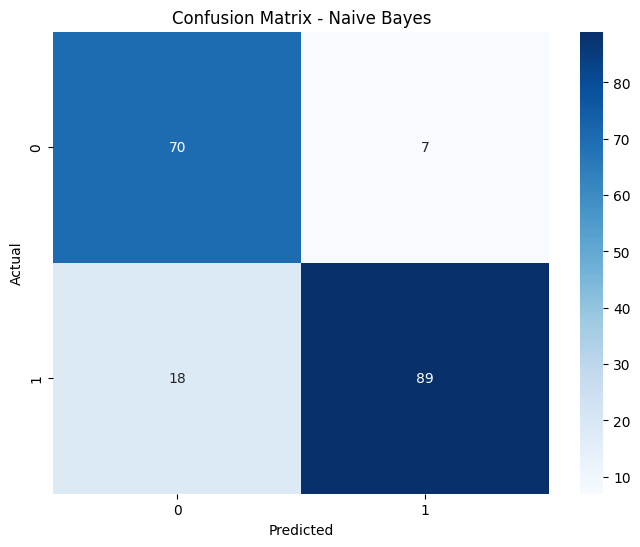

In [10]:
# Fungsi untuk melatih dan mengevaluasi model
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
train_evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest")

# Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
train_evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "SVM")

# Naive Bayes
nb_model = GaussianNB()
train_evaluate_model(nb_model, X_train_scaled, X_test_scaled, y_train, y_test, "Naive Bayes")

# Penjelasan:
# Kita mengimplementasikan dan mengevaluasi empat model berbeda: Logistic Regression, Random Forest, SVM, dan Naive Bayes.
# Setiap model memiliki kelebihan dan kekurangan:
# - Logistic Regression: Sederhana dan interpretable, cocok untuk hubungan linear.
# - Random Forest: Dapat menangkap hubungan non-linear dan memberikan feature importance.
# - SVM: Efektif dalam ruang berdimensi tinggi dan versatile dengan berbagai kernel.
# - Naive Bayes: Cepat dan efisien, terutama untuk dataset yang lebih besar.
#
# Kita menggunakan berbagai metrik evaluasi untuk mendapatkan gambaran komprehensif tentang performa model:
# - Accuracy: Ukuran keseluruhan ketepatan prediksi.
# - Precision: Proporsi prediksi positif yang benar.
# - Recall: Proporsi kasus positif yang berhasil diidentifikasi.
# - F1-score: Rata-rata harmonik dari precision dan recall.
# - ROC-AUC: Kemampuan model untuk membedakan antara kelas.

## 6. Feature Importance (Random Forest)

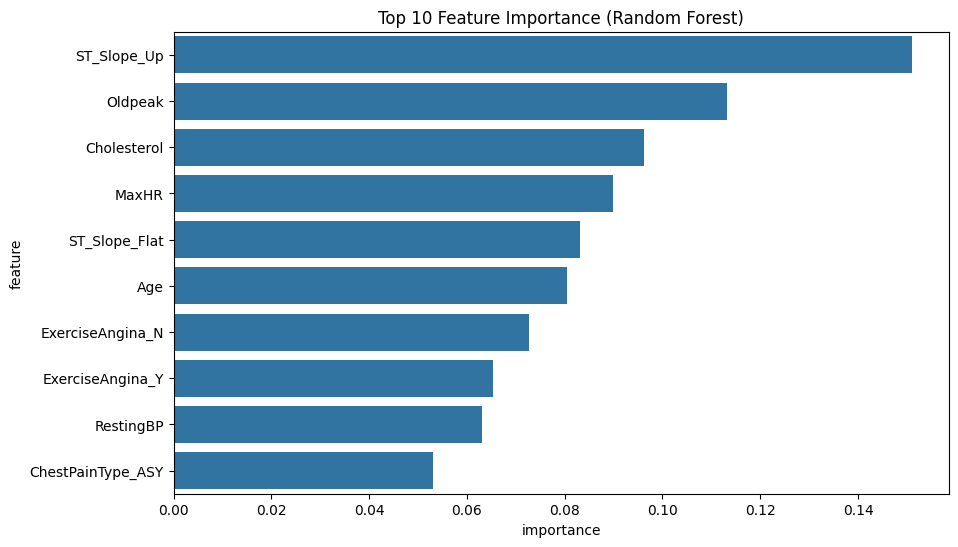

              feature  importance
19        ST_Slope_Up    0.150948
5             Oldpeak    0.113274
2         Cholesterol    0.096225
4               MaxHR    0.089923
18      ST_Slope_Flat    0.083204
0                 Age    0.080382
15   ExerciseAngina_N    0.072656
16   ExerciseAngina_Y    0.065329
1           RestingBP    0.063082
8   ChestPainType_ASY    0.053019


In [11]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance (Random Forest)')
plt.show()

print(feature_importance.head(10))

# Penjelasan:
# Analisis feature importance membantu kita memahami fitur mana yang paling berpengaruh
# dalam prediksi model. Ini dapat memberikan insight berharga untuk interpretasi model
# dan mungkin dapat digunakan untuk feature selection di masa depan.


## 7. Hyperparameter Tuning

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.8787251887056193
Tuned Random Forest Results:
Accuracy: 0.8804
Precision: 0.8972
Recall: 0.8972
F1-score: 0.8972
ROC-AUC: 0.9461


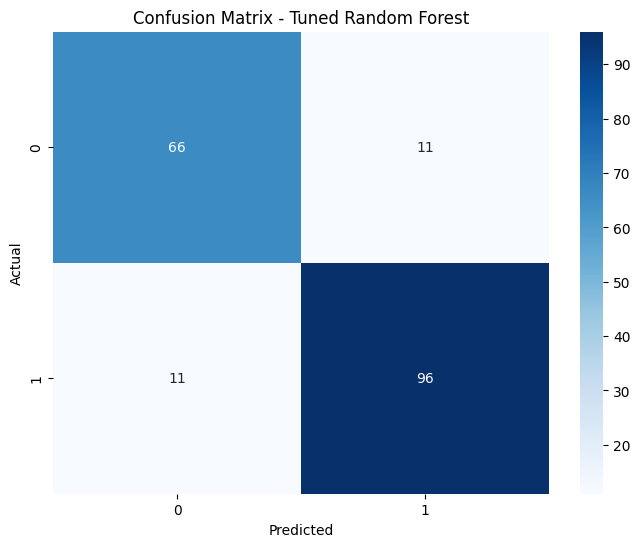

In [12]:
# Hyperparameter tuning untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

print("Best parameters:", rf_grid.best_params_)
print("Best cross-validation score:", rf_grid.best_score_)

# Evaluate tuned Random Forest model
train_evaluate_model(rf_grid.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, "Tuned Random Forest")


# Penjelasan:
# Hyperparameter tuning penting untuk mengoptimalkan performa model. Kita menggunakan GridSearchCV
# untuk mencari kombinasi hyperparameter terbaik untuk model Random Forest. Ini dapat meningkatkan
# performa model secara signifikan.

## 8. Advanced Techniques

# 8.1 Deep Learning (Neural Network)

In [13]:
def create_nn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model(X_train_scaled.shape[1])
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Neural Network model
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")
print("\nNeural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_nn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, nn_model.predict(X_test_scaled)):.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Neural Network Results:
Accuracy: 0.8641
Precision: 0.9100
Recall: 0.8505
F1-score: 0.8792
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ROC-AUC: 0.9229


##Deep Learning (Neural Network): Kita mengimplementasikan sebuah jaringan saraf sederhana menggunakan Keras. Ini bisa menangkap pola yang lebih kompleks dalam data.

# 8.2 Ensemble Method (XGBoost)

XGBoost Results:
Accuracy: 0.8750
Precision: 0.9038
Recall: 0.8785
F1-score: 0.8910
ROC-AUC: 0.9340


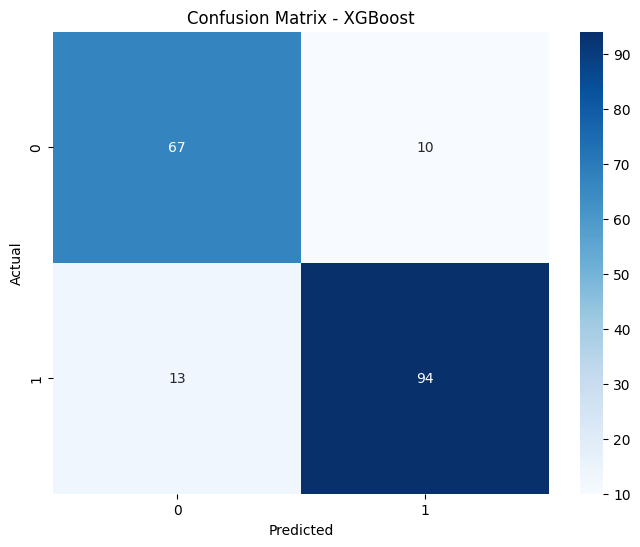

In [14]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost model
train_evaluate_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, "XGBoost")

##XGBoost: Ini adalah metode ensemble yang lebih canggih dan sering memberikan performa tinggi.

# 8.3 Cross-validation

In [15]:
!pip install scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler # Assuming StandardScaler is used for scaling
# ... your existing code ...

# Assuming X is your feature data and y is your target variable
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Assuming X is your feature data

# Now you can use X_scaled in cross_val_score
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.90217391 0.82065217 0.83152174 0.83060109 0.7704918 ]
Mean CV score: 0.8311


##Cross-validation: Kita menggunakan 5-fold cross-validation untuk mendapatkan estimasi performa model yang lebih robust.

# 8.4 Handling Imbalanced Data

Random Forest with SMOTE Results:
Accuracy: 0.8804
Precision: 0.9048
Recall: 0.8879
F1-score: 0.8962
ROC-AUC: 0.9413


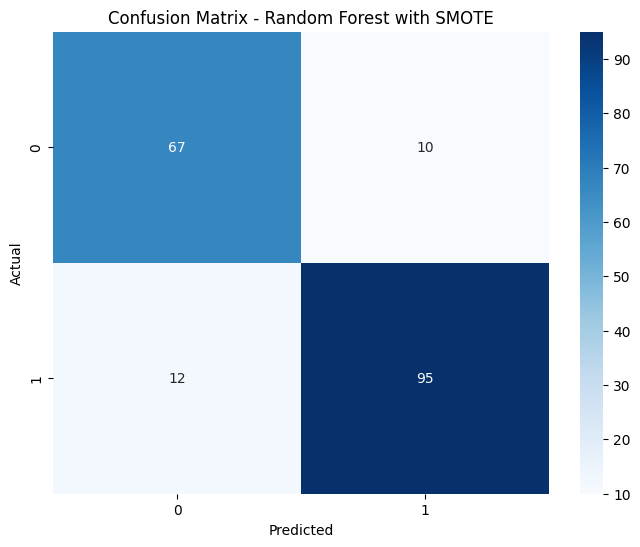

In [16]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train and evaluate model with SMOTE
rf_model_smote = RandomForestClassifier(random_state=42)
train_evaluate_model(rf_model_smote, X_train_smote, X_test_scaled, y_train_smote, y_test, "Random Forest with SMOTE")


##Handling Imbalanced Data: SMOTE digunakan untuk oversampling kelas minoritas, yang bisa membantu jika kelas-kelas tidak seimbang.

# 8.5 Model Interpretability (SHAP)

Performing analysis for multi-class classification


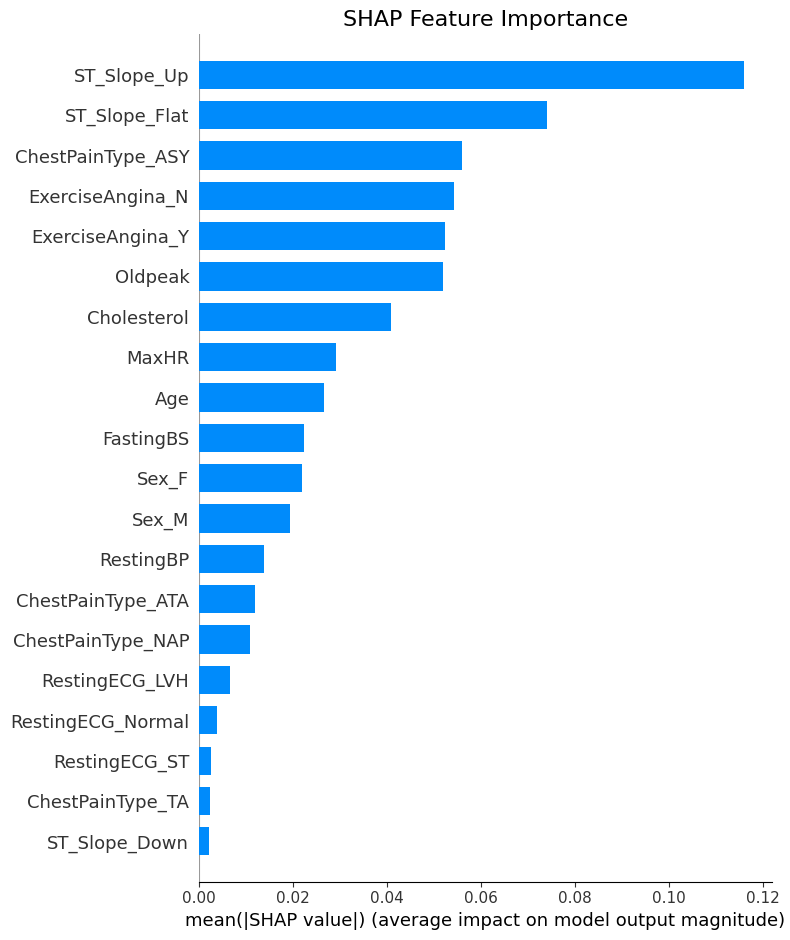

<Figure size 1000x600 with 0 Axes>

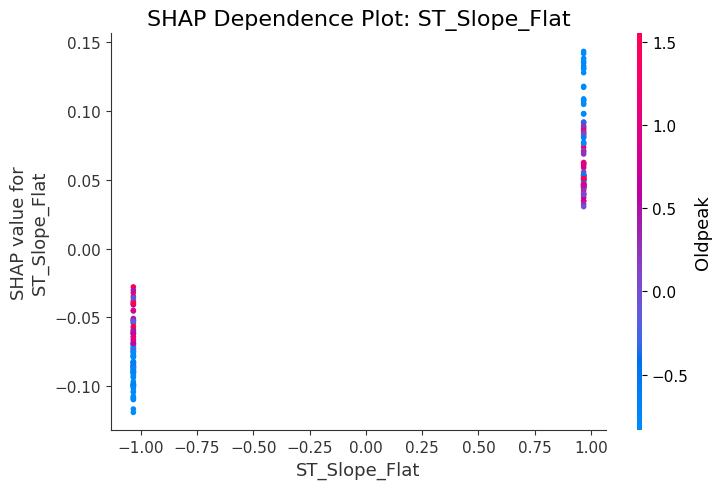

<Figure size 1000x600 with 0 Axes>

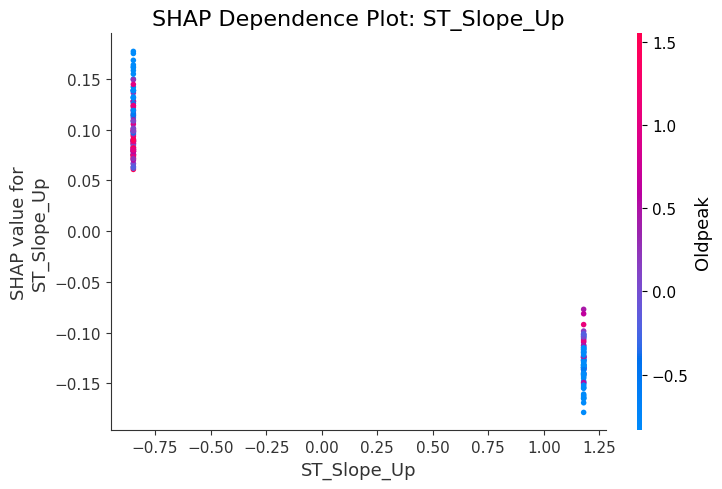

SHAP visualizations have been displayed and saved as PNG files.
SHAP version: 0.46.0
Shape of X_test_scaled_np: (184, 20)
Shape of shap_values: (184, 20, 2)
Number of features in X: 20
Features in X: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [24]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pastikan rf_model, X_test_scaled, dan X sudah didefinisikan sebelumnya

# Konversi X_test_scaled ke numpy array
X_test_scaled_np = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else np.array(X_test_scaled)

# Buat SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Hitung nilai SHAP
shap_values = explainer(X_test_scaled_np)

# Cek apakah model adalah multi-class atau binary
if len(shap_values.shape) == 2:
    # Binary classification
    print("Performing analysis for binary classification")
    shap_values_for_plot = shap_values.values
elif len(shap_values.shape) == 3:
    # Multi-class classification
    print("Performing analysis for multi-class classification")
    # shap_values_for_plot = shap_values.sum(axis=0)  # Sum over all classes
    # Select the class you want to plot if it is multi-class
    shap_values_for_plot = shap_values[:, :, 1].values  # Assuming it is binary, change 1 to the desired class index if necessary.
else:
    raise ValueError("Unexpected shape of shap_values")

# Reshape shap_values_for_plot to match X_test_scaled_np if needed:
# shap_values_for_plot = shap_values_for_plot.reshape(X_test_scaled_np.shape[0], -1) # This line is removed as it is no longer needed.


# Buat plot summary
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_for_plot, X_test_scaled_np, plot_type="bar", feature_names=X.columns, show=False)
plt.title("SHAP Feature Importance", fontsize=16)
plt.tight_layout()
plt.savefig('shap_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Tampilkan plot dependensi untuk dua fitur teratas
top_features_idx = np.argsort(np.abs(shap_values_for_plot).mean(0))[-2:]
top_features = X.columns[top_features_idx]
for feature in top_features:
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(feature, shap_values_for_plot, X_test_scaled_np, feature_names=X.columns, show=False)
    plt.title(f"SHAP Dependence Plot: {feature}", fontsize=16)
    plt.tight_layout()
    plt.savefig(f'shap_dependence_{feature}.png', dpi=300, bbox_inches='tight')
    plt.show()

print("SHAP visualizations have been displayed and saved as PNG files.")

# Tambahan: Print informasi debugging
print(f"SHAP version: {shap.__version__}")
print(f"Shape of X_test_scaled_np: {X_test_scaled_np.shape}")
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Number of features in X: {len(X.columns)}")
print(f"Features in X: {X.columns.tolist()}")

# Interpretabilitas Model: Analisis SHAP

Nilai SHAP memberikan wawasan tentang pentingnya fitur dan bagaimana setiap fitur berkontribusi pada prediksi.

1. SHAP Dependence Plot (ST_Slope_Up dan ST_Slope_Flat):
   - Menunjukkan bagaimana nilai fitur ini mempengaruhi prediksi model.
   - Interaksi dengan Oldpeak terlihat melalui variasi warna.

2. SHAP Feature Importance:
   - ST_Slope, ChestPainType, dan ExerciseAngina adalah fitur paling berpengaruh.
   - Faktor risiko tradisional seperti Cholesterol dan Age memiliki pengaruh moderat.

Kesimpulan: Karakteristik tes latihan jantung (ST_Slope, ExerciseAngina) dan tipe nyeri dada menjadi prediktor utama dalam model ini.